In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 64 kB 1.0 MB/s eta 0:00:011


/kaggle/input/indian-cities-database/Indian Cities Database.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv


In [2]:
city_day = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
#city_hour = pd.read_csv('../input/air-quality-data-in-india/city_hour.csv')
#station = pd.read_csv('../input/air-quality-data-in-india/stations.csv')
#station_day = pd.read_csv('../input/air-quality-data-in-india/station_day.csv')
#station_hour = pd.read_csv('../input/air-quality-data-in-india/station_hour.csv')
cities_db = pd.read_csv('../input/indian-cities-database/Indian Cities Database.csv')


# <a> 1. A first look at City level- daily data</a>

We have daily and hourly city data as well as daily and hourly Station data. Station refers to the continuous pollution monitoring stations operated and maintained by the Central Pollution Control Board (CPCB) and the State Pollution Control Boards. 
Let's begin by analyzing the various cities' daily data to get a big picture. We shall begin by importing the dataset and the necessary libraries for the analysis.


In [3]:
display("CITY DAILY DATA")
display(city_day.head(5))

'CITY DAILY DATA'

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


There seems to be a lot of missing values in the dataset. Additionally, the Date column is also not in the Date-Time format. 

## <a> 1.1 Missing Values </a>

It is always a good idea to see the missing values as a percentage of total values

In [5]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16807,64.100000
PM10,10766,41.100000
NH3,9847,37.600000
Toluene,7555,28.800000
Benzene,5287,20.200000
PM2.5,4289,16.400000
AQI,4282,16.300000
AQI_Bucket,4282,16.300000
NOx,4043,15.400000
O3,3660,14.000000


> ** 📌 Points to note :** 
> * It seems that we have a lot of null values in some columns e.g.Xylene and NH3.There could be a couple of reasons for the missing data:
  * Station does not have device to capture it.
  * Issue in the meter reading.

Here is a notebook that I wrote on handling missing data in Python. it includes a section on Missing values in Time Series problems too .
[Handling missing values in Python](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values)


## <a> 1.2 Cities in the dataset</a>

In [6]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 24
Index(['Mumbai', 'Chennai', 'Delhi', 'Ahmedabad', 'Bengaluru', 'Lucknow',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi',
       'Aizawl'],
      dtype='object')


## <a> 1.3 Convert to Date Time format</a>

Let's convert the `Date` column into Date Time format with the help of `datetime` library.

In [7]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)


## <a> 1.4 Data Availability</a>

In [8]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-05-01 00:00:00


# <a>2. Analysing the complete City Level Daily Data</a>

Let's now analyse the work with the data to see what patterns and insights we can uncover from it.

## <a> 2.1 Combining the Benzene, Toluene and Xylene levels into one column - BTX</a>

In [9]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);



## <a> 2.2 Combining the PM2.5 and PM10 into one column - Particulate Matter</a>

In [10]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

## <a> 2.3 Subsetting columns</a>

Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called `pollutants` containg the major pollutants responsible for air pollution.

In [11]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

## <a> 2.3 Visualising yearly data </a>

I'll plot the data as dots instead of lines since with so many data points, the line plot will become crowded and will be hard to read.

> ** 📌 Points to note :** 
> * PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.
> * SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.

This is just an overview. We will have to look deeper to get specific answers. 


In [13]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

## <a> 2.4 Year and Month wise distribution </a>

Next, let’s further explore the seasonality of our data with box plots. We shall use boxplots to group the data by different time periods and display the distributions for each group. We’ll group the data by year and month. All measurements are in `ug / m3`.

### <a> 2.4.1 NO<sub>2</sub> </a>

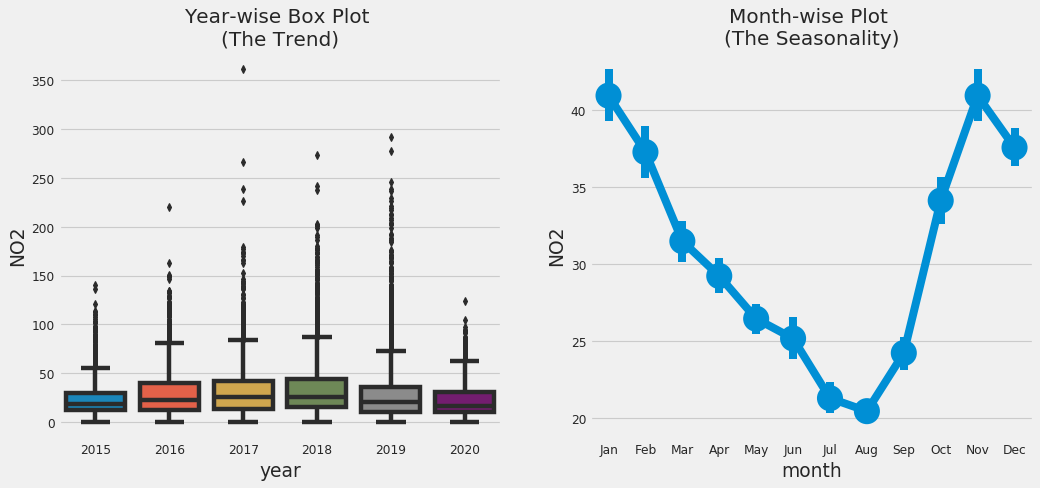

In [14]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

### <a> 2.4.2 SO<sub>2</sub> </a>

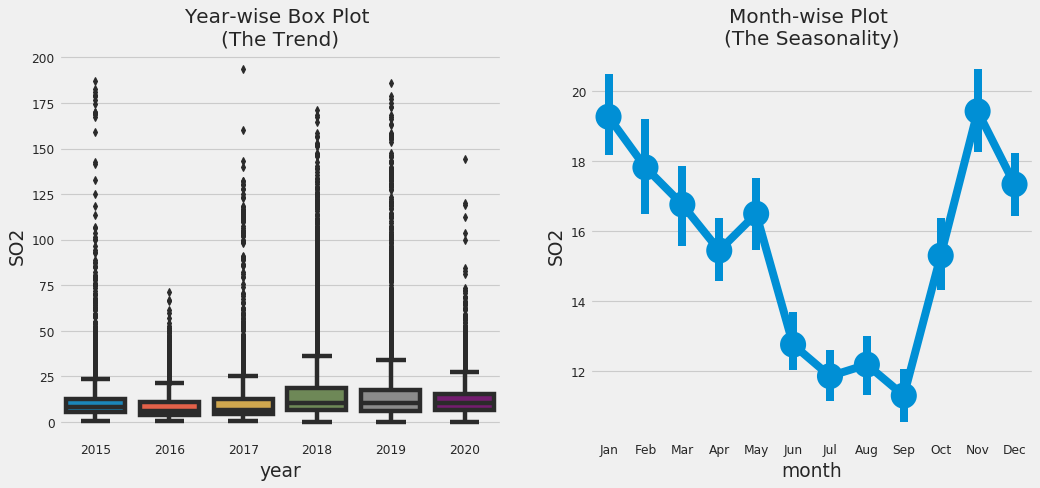

In [15]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

### <a> 2.4.3 BTX </a>

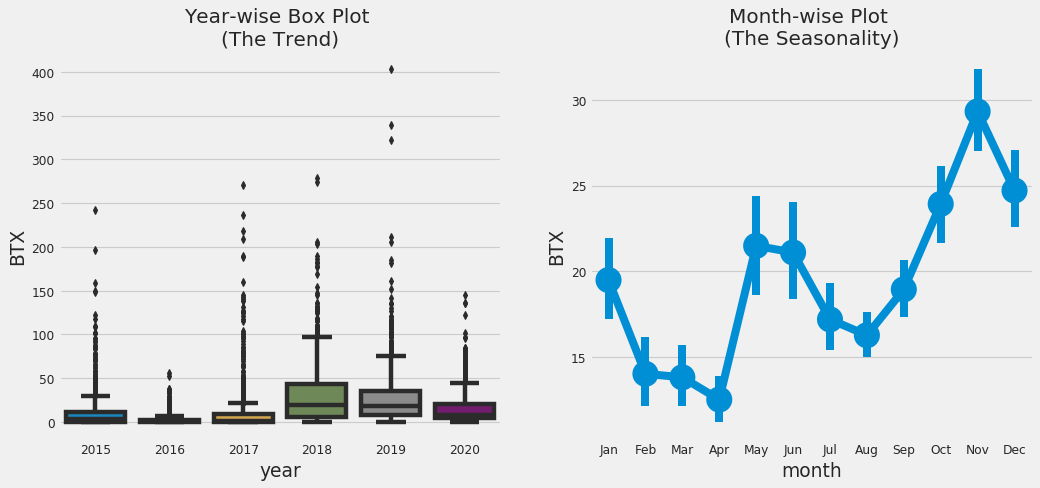

In [16]:

value='BTX'
trend_plot(df,value)

### <a> 2.4.4 PM2.5 </a>

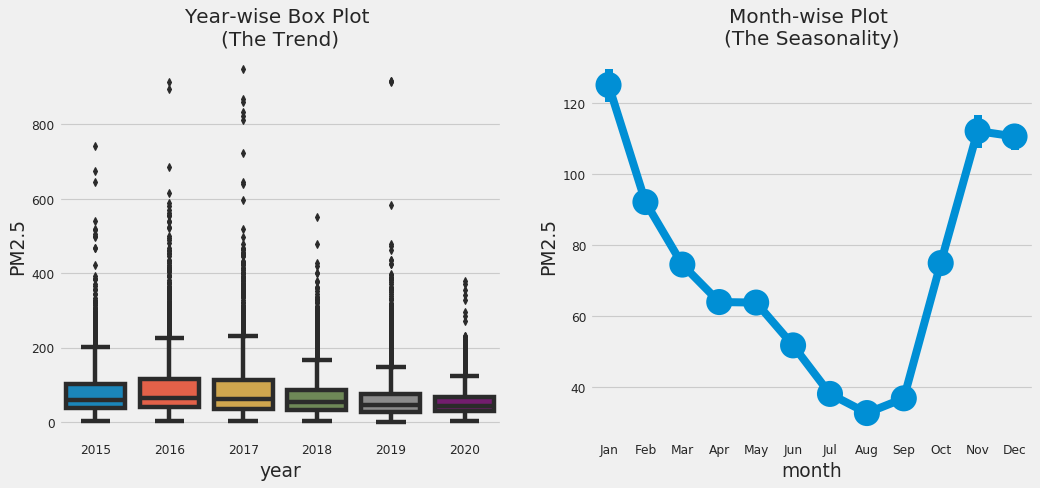

In [17]:
value='PM2.5'
trend_plot(df,value)

### <a> 2.4.5 PM10 </a>

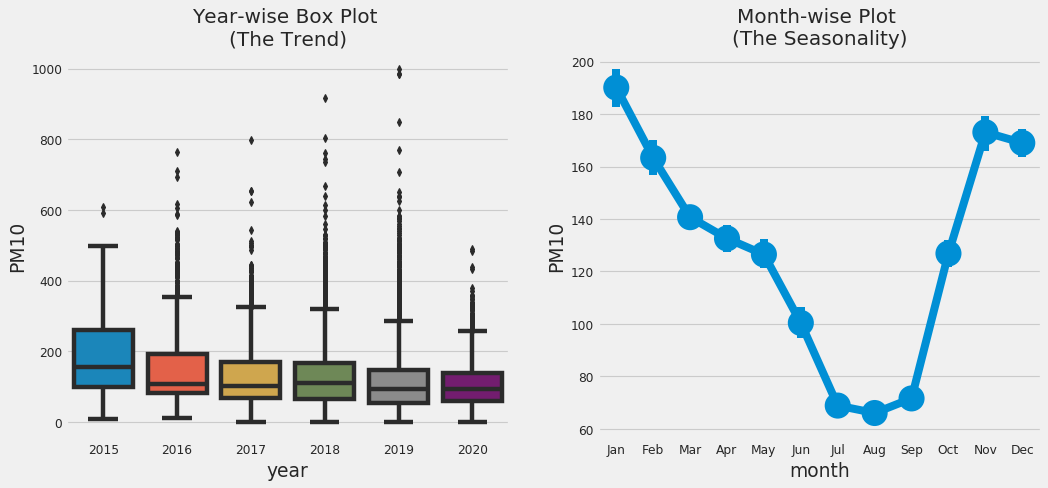

In [18]:

value='PM10'
trend_plot(df,value)

> ** 📌 Points to note :** 
> * There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon sesason sets in during these months.The BTX levels additionally show a major decline around April.
> * The pollution level then start rising and reach highest leveks in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.
> * SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
> * The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.



In [19]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [20]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [21]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

,City,PM2.5
0,Patna,127.480000
1,Gurugram,119.800000
2,Delhi,119.270000
3,Lucknow,111.630000
4,Ahmedabad,69.660000
5,Guwahati,69.560000
6,Kolkata,68.690000
7,Jorapokhar,65.900000
8,Brajrajnagar,63.880000
9,Talcher,63.740000


> ** 📌 Points to note :** 
> * Patna, Delhi , Ahmedabad and Kolkata seem to top the charts. Ahmedabad has maximum concenterations of NO2,SO2 as well as CO levels.

Let's also look at the above data visually to get a better perspective